In [1]:
import torch
import matplotlib.pyplot as plt
from maml.datasets.task import plot_task
from maml.models.conv_embedding_model import ConvEmbeddingModel
from maml.datasets.miniimagenet import MiniimagenetMetaDataset

In [2]:
dataset = MiniimagenetMetaDataset(
    root='data',
    img_side_len=84,
    num_classes_per_batch=5,
    num_samples_per_class=5,
    num_total_batches=5,
    num_val_samples=5,
    meta_batch_size=2,
    train=True,
    num_workers=4,
    device='cuda')

MiniImagenet using train


In [3]:
for train_batch, val_batch in iter(dataset):
    break

In [4]:
task_train, task_val = train_batch[0], val_batch[0]

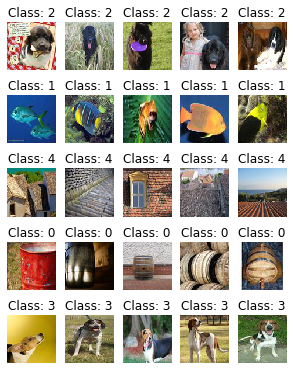

In [9]:
plot_task(task_train)

In [10]:
task_train.y

tensor([2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 4, 4, 4, 4, 4, 0, 0, 0, 0, 0, 3, 3, 3, 3,
        3], device='cuda:0')

In [11]:
dataset.input_size

(3, 84, 84)

In [16]:
emb = ConvEmbeddingModel(img_size=dataset.input_size,
                        modulation_dims=[32,64,128,256],
                        use_label=True,
                        num_classes=5,
                        hidden_size=128,
                        num_layers=2,
                        convolutional=True,
                        num_conv=4,
                        num_channels=32,
                        num_channels_max=256,
                        rnn_aggregation=True,
                        linear_before_rnn=True,
                        avgpool_after_conv=False)
emb.to('cuda')

In [23]:
label_embedding = emb._label_representations(task_train.y).view(-1, 1, 84, 84)

In [37]:
emb._label_representations(task_train.y)

tensor([[-0.4066,  1.4056, -0.8839,  ...,  2.0460, -0.7048, -1.5301],
        [-0.4066,  1.4056, -0.8839,  ...,  2.0460, -0.7048, -1.5301],
        [-0.4066,  1.4056, -0.8839,  ...,  2.0460, -0.7048, -1.5301],
        ...,
        [ 0.9641, -0.4216, -1.4026,  ..., -0.3610, -1.2303,  0.9954],
        [ 0.9641, -0.4216, -1.4026,  ..., -0.3610, -1.2303,  0.9954],
        [ 0.9641, -0.4216, -1.4026,  ..., -0.3610, -1.2303,  0.9954]],
       device='cuda:0', grad_fn=<EmbeddingBackward>)

In [38]:
padded_input = torch.cat((task_train.x, label_embedding), dim=1)

In [30]:
images = padded_input.cpu().detach().numpy().transpose(0,2,3,1)

In [31]:
images.shape

(25, 84, 84, 4)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


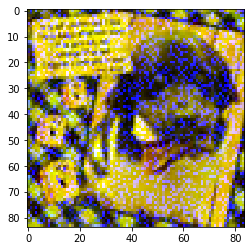

In [35]:
plt.imshow(images[0,:,:,1:4])

In [17]:
len(emb(task_train))

4

In [18]:
emb(task_train)[1].shape

torch.Size([1, 64])

In [7]:
emb.linear

Linear(in_features=9216, out_features=128, bias=True)

In [9]:
emb._num_layer_per_conv

3

In [10]:
emb.conv[emb._num_layer_per_conv*(emb._num_conv-1)].out_channels

256

In [13]:
emb.compute_input_size(1, 3, 2, 256)

9216